In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [2]:
data_train = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')

# 1. 데이터 확인

In [3]:
data_train.head()

id Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0   1      M   0.605     0.470   0.115        1.1140          0.3925   
1   2      I   0.430     0.315   0.095        0.3780          0.1750   
2   3      I   0.580     0.490   0.195        1.3165          0.5305   
3   4      M   0.535     0.405   0.175        1.2705          0.5480   
4   5      I   0.310     0.235   0.090        0.1270          0.0480   

   Viscra Weight  Shell Weight  Target  
0         0.2910        0.3100      15  
1         0.0800        0.1045       8  
2         0.2540        0.4100      18  
3         0.3265        0.3370      13  
4         0.0310        0.0400       6

In [4]:
data_test.head()

id Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0   1      F   0.595     0.470   0.155         1.121          0.4515   
1   2      M   0.580     0.450   0.150         0.927          0.2760   
2   3      I   0.260     0.205   0.070         0.097          0.0415   
3   4      M   0.590     0.460   0.130         1.102          0.4550   
4   5      F   0.595     0.465   0.140         1.113          0.5175   

   Viscra Weight  Shell Weight  
0         0.1780        0.1550  
1         0.1815        0.3600  
2         0.0190        0.0305  
3         0.2055        0.3300  
4         0.2440        0.3050

- id : 샘플 아이디
- Gender : 전복 성별
- Lenght : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키 
- Whole : Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게
- Target : 전복 나이

In [5]:
data_train.rename(columns={'Lenght':'Length'}, inplace = True)
data_test.rename(columns={'Lenght':'Length'}, inplace = True)
data_train.head()

id Gender  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0   1      M   0.605     0.470   0.115        1.1140          0.3925   
1   2      I   0.430     0.315   0.095        0.3780          0.1750   
2   3      I   0.580     0.490   0.195        1.3165          0.5305   
3   4      M   0.535     0.405   0.175        1.2705          0.5480   
4   5      I   0.310     0.235   0.090        0.1270          0.0480   

   Viscra Weight  Shell Weight  Target  
0         0.2910        0.3100      15  
1         0.0800        0.1045       8  
2         0.2540        0.4100      18  
3         0.3265        0.3370      13  
4         0.0310        0.0400       6

In [6]:
print('train shape:', data_train.shape)
print('test shape:', data_test.shape)

train shape: (1253, 10)
test shape: (2924, 9)


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1253 non-null   int64  
 1   Gender          1253 non-null   object 
 2   Length          1253 non-null   float64
 3   Diameter        1253 non-null   float64
 4   Height          1253 non-null   float64
 5   Whole Weight    1253 non-null   float64
 6   Shucked Weight  1253 non-null   float64
 7   Viscra Weight   1253 non-null   float64
 8   Shell Weight    1253 non-null   float64
 9   Target          1253 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 98.0+ KB


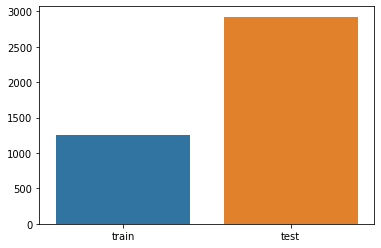

In [8]:
x = ['train', 'test']
y = [data_train.shape[0], data_test.shape[0]]
ax = sns.barplot(x=x, y=y)

train 데이터 셋이 적다.

In [9]:
# 성별 유니크 값
data_train['Gender'].unique()

array(['M', 'I', 'F'], dtype=object)

- M: 수컷
- I: 유충
- F: 암컷

# 2. 데이터 전처리

feature / targetd의 연관관계

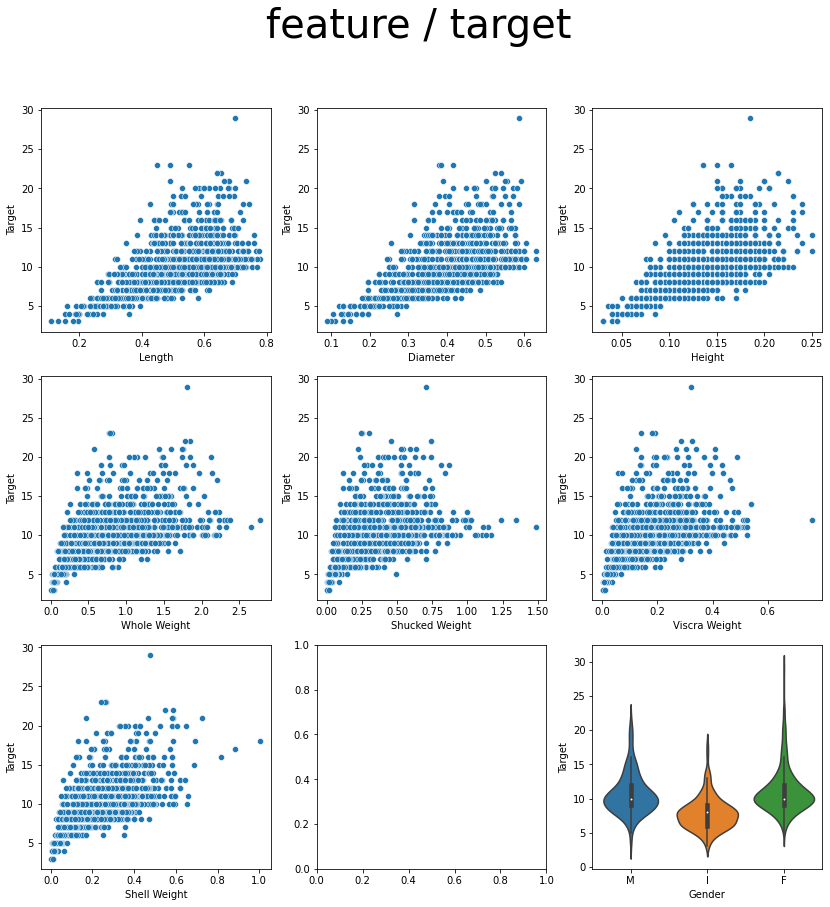

In [10]:
fig, ax = plt.subplots(3, 3, figsize = (14, 14))

plt.suptitle('feature / target', fontsize=40)

feature = ['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Gender']

xvalue = 0
yvalue = 0

for xstr in feature:
    if xstr == 'Gender':
        sns.violinplot(x=xstr, y='Target', data=data_train)
    else:
        sns.scatterplot(x=xstr, y='Target', data=data_train, ax=ax[yvalue][xvalue])
        
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

- 모든 numeric feature들이 Target과 비례관계이다.
- Gender는 M / F에 비해 I가 낮은 Target 점수를 갖고 있다.
- scatter plot을 보았을 때, 15 이상의 점수에 대해서는 데이터가 적은 것으로 보여 적당한 oversampling이 필요할 것으로 예상된다.
    - 오버 샘플링(Oversampling): 적은 레이블을 가진 데이터 세트를 많은 레이블을 가진 데이터 세트 수준으로 증식하여 학습에 충분한 데이터를 확보하는 기법
- 25 이상인 점이 하나 보여 제거한다.

## 2-1. 이상치 제거

In [11]:
data_train[data_train['Target'] > 20]

id Gender  Length  Diameter  Height  Whole Weight  Shucked Weight  \
216    217      M   0.675     0.555   0.200        1.4385          0.5450   
448    449      F   0.680     0.550   0.200        1.5960          0.5250   
553    554      F   0.450     0.380   0.165        0.8165          0.2500   
629    630      M   0.655     0.540   0.215        1.8440          0.7425   
735    736      F   0.640     0.525   0.215        1.7790          0.4535   
762    763      F   0.700     0.585   0.185        1.8075          0.7055   
792    793      M   0.735     0.590   0.225        1.7560          0.6370   
1131  1132      F   0.550     0.415   0.135        0.7750          0.3020   
1140  1141      M   0.490     0.390   0.150        0.5730          0.2250   
1172  1173      F   0.665     0.500   0.175        1.7420          0.5950   
1234  1235      F   0.490     0.385   0.150        0.7865          0.2410   

      Viscra Weight  Shell Weight  Target  
216          0.2665         0.465      21  
448          0.4075         0.585      21  
553          0.1915         0.265      23  
629          0.3270         0.585      22  
735          0.2855         0.550      22  
762          0.3215         0.475      29  
792          0.3405         0.580      21  
1131         0.1790         0.260      23  
1140         0.1240         0.170      21  
1172         0.3025         0.725      21  
1234         0.1400         0.240      23

혼자 29의 높은 나이를 가진 행은 이상치라고 판단하여 제거함

In [12]:
data_train = data_train.drop(index=[762], axis=0)

In [13]:
# '전복의 전체무게 < 전복의 무게 + 껍질의 무게' 인 경우 확인
a = data_train['Whole Weight'] < data_train['Shucked Weight'] + data_train['Shell Weight']
data_train[a]

id Gender  Length  Diameter  Height  Whole Weight  Shucked Weight  \
47      48      I   0.380     0.275   0.095        0.1375          0.0860   
382    383      I   0.455     0.330   0.100        0.3720          0.3580   
435    436      I   0.475     0.365   0.100        0.1315          0.2025   
847    848      I   0.230     0.165   0.060        0.0515          0.0190   
1078  1079      I   0.275     0.205   0.070        0.1055          0.4950   

      Viscra Weight  Shell Weight  Target  
47           0.0585        0.0605       7  
382          0.0775        0.1100       8  
435          0.0875        0.1230       7  
847          0.0145        0.0360       4  
1078         0.0190        0.0315       5

In [14]:
# 삭제
data_train = data_train.drop(index=[47, 382, 435, 847, 1078], axis=0)

In [15]:
# '전복의 무게 < 전복의 내장 무게' 인 경우 확인
data_train[data_train['Shucked Weight'] < data_train['Viscra Weight']]

id Gender  Length  Diameter  Height  Whole Weight  Shucked Weight  \
465  466      M   0.415     0.315   0.125         0.388           0.068   

     Viscra Weight  Shell Weight  Target  
465           0.09         0.125      12

In [16]:
# 삭제
data_train = data_train.drop(index=[465], axis=0)

In [17]:
# 길이보다 지름이 더 큰 경우
data_train[data_train['Length'] < data_train['Diameter']]

Empty DataFrame
Columns: [id, Gender, Length, Diameter, Height, Whole Weight, Shucked Weight, Viscra Weight, Shell Weight, Target]
Index: []

## 2-2. 새로운 features

In [18]:
# '전체 무게 - 전복의 무게 - 껍질의 무게' 는 전복이 머금고 있는 물의 양
data_train['Water'] = data_train['Whole Weight'] - data_train['Shucked Weight'] - data_train['Shell Weight']

In [19]:
# '전체 무게 - 물의 양'을 해줘 전복이 랜덤하게 머금던 물의 양에 영향을 받지 않도록 함
data_train['Whole Weight'] = data_train['Whole Weight'] - data_train['Water']

In [20]:
# '물의 양' 컬럼 삭제
data_train = data_train.drop(columns = ['Water'], axis=1)

In [21]:
# test 셋에도 동일하게 적용
data_test['Water'] = data_test['Whole Weight'] - data_test['Shucked Weight'] - data_test['Shell Weight']
data_test['Whole Weight'] = data_test['Whole Weight'] - data_test['Water']
data_test = data_test.drop(columns = ['Water'], axis=1)

# 3. Target Oversampling

<AxesSubplot:xlabel='Target', ylabel='Count'>

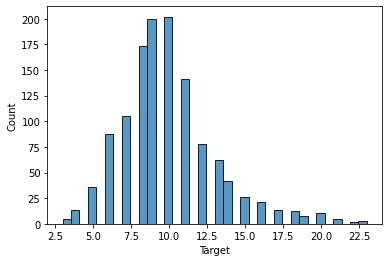

In [22]:
sns.histplot(data_train['Target'])

- 10을 기준으로 종모양 분포가 나타나고 있다.
- 15이상 Target에 대한 샘플이 충분하지 않아, oversampling이 필요하다.

In [23]:
# 0~9살, 10~14살, 15살 이상 분포 확인
data_train_T = data_train['Target']
target = []

for i in range(len(data_train_T)):
    if data_train_T.iloc[i] < 10:
        target.append(1)
    elif data_train_T.iloc[i] < 15:
        target.append(2)
    else:
        target.append(3)
        
data_train['Range'] = target

<AxesSubplot:xlabel='Range', ylabel='count'>

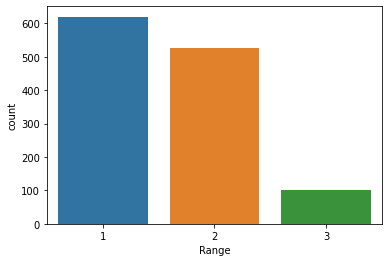

In [24]:
sns.countplot(x=data_train['Range'])

## 3-1. 가중치 값 증가

In [25]:
data_train_3 = data_train[data_train['Range'] == 3]

In [26]:
data_train = data_train.append(data_train_3)

<AxesSubplot:xlabel='Range', ylabel='count'>

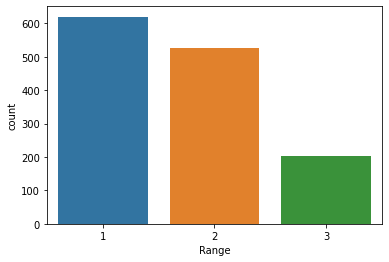

In [27]:
sns.countplot(x=data_train['Range'])

# 4. 데이터셋 X, Y 나누기
- Gender feature에 one hot encoding을 적용한다.

In [28]:
data_test = pd.get_dummies(data_test)
data_test.head()

id  Length  Diameter  Height  Whole Weight  Shucked Weight  Viscra Weight  \
0   1   0.595     0.470   0.155        0.6065          0.4515         0.1780   
1   2   0.580     0.450   0.150        0.6360          0.2760         0.1815   
2   3   0.260     0.205   0.070        0.0720          0.0415         0.0190   
3   4   0.590     0.460   0.130        0.7850          0.4550         0.2055   
4   5   0.595     0.465   0.140        0.8225          0.5175         0.2440   

   Shell Weight  Gender_F  Gender_I  Gender_M  
0        0.1550         1         0         0  
1        0.3600         0         0         1  
2        0.0305         0         1         0  
3        0.3300         0         0         1  
4        0.3050         1         0         0

In [29]:
data_train = pd.get_dummies(data_train)
data_train.head()

id  Length  Diameter  Height  Whole Weight  Shucked Weight  Viscra Weight  \
0   1   0.605     0.470   0.115        0.7025          0.3925         0.2910   
1   2   0.430     0.315   0.095        0.2795          0.1750         0.0800   
2   3   0.580     0.490   0.195        0.9405          0.5305         0.2540   
3   4   0.535     0.405   0.175        0.8850          0.5480         0.3265   
4   5   0.310     0.235   0.090        0.0880          0.0480         0.0310   

   Shell Weight  Target  Range  Gender_F  Gender_I  Gender_M  
0        0.3100      15      3         0         0         1  
1        0.1045       8      1         0         1         0  
2        0.4100      18      3         0         1         0  
3        0.3370      13      2         0         0         1  
4        0.0400       6      1         0         1         0

In [30]:
data_train_X = data_train.drop(columns=['Target'], axis=1)
data_train_X.head()

id  Length  Diameter  Height  Whole Weight  Shucked Weight  Viscra Weight  \
0   1   0.605     0.470   0.115        0.7025          0.3925         0.2910   
1   2   0.430     0.315   0.095        0.2795          0.1750         0.0800   
2   3   0.580     0.490   0.195        0.9405          0.5305         0.2540   
3   4   0.535     0.405   0.175        0.8850          0.5480         0.3265   
4   5   0.310     0.235   0.090        0.0880          0.0480         0.0310   

   Shell Weight  Range  Gender_F  Gender_I  Gender_M  
0        0.3100      3         0         0         1  
1        0.1045      1         0         1         0  
2        0.4100      3         0         1         0  
3        0.3370      2         0         0         1  
4        0.0400      1         0         1         0

In [31]:
data_train_y = data_train['Target']
data_train_y.head()

0    15
1     8
2    18
3    13
4     6
Name: Target, dtype: int64

# 5. 모델 생성 및 학습하기
- soft 앙상블을 함: MLP + NGB + XGB + CATBOOST
- (CATBOOST가 학습시간이 좀 걸림)

In [32]:
def NMAE(true, pred):
    score = np.mean(np.abs(true - pred) / true)
    return score

In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.utils import shuffle
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from ngboost import NGBRegressor

In [39]:
skf = StratifiedKFold(n_splits=10, random_state=2022, shuffle=True) # 총 15번의 fold 진행
n=0 # x번째 fold인지 기록

fold_target_pred = []

for train_index, valid_index in skf.split(data_train_X, data_train_X['Range']):
    n += 1
    
    val_pred_name = [] # validation pred model 이름 저장
    val_pred = [] # validation set pred 결과 저장
    target_pred = [] # test set pred 결과 저장
    
    train_X = np.array(data_train_X.drop('Range', axis=1)) # 분배된 학습을 만들기 위해 만들어둔 Range feature 제거
    train_Y = np.array(data_train_y)
    
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train, y_valid = train_Y[train_index], train_Y[valid_index]
    
    X_test = np.array(data_test)
    
    ### MLPRegressor ###
    model = MLPRegressor(random_state=2022, activation='tanh')
    model.fit(X_train, y_train) # 모델학습
    
    val_pred_name.append('MLPRegressor') # 모델 이름 저장
    val_pred.append(model.predict(X_valid)) # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### XGBRegressor ###
    model = XGBRegressor(random_state=2022,)
    model.fit(X_train, y_train)
    
    val_pred_name.append('XGBRegressor') # 모델 이름 저장
    val_pred.append(model.predict(X_valid)) # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### CatBoostRegressor ###
    model = CatBoostRegressor(iterations=1000, verbose=0, task_type='GPU', random_state=2022)
    model.fit(X_train, y_train)
    
    val_pred_name.append('CatBoostRegressor') # 모델 이름 저장
    val_pred.append(model.predict(X_valid)) # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### voting ###
    
    ### aveage validation pred ###
    preds = np.array(val_pred[0])
    for i in range(1, len(val_pred)):
        preds += val_pred[i]
        
    preds = preds/len(val_pred)
    
    ### average target pred ###
    target_preds = np.array(target_pred[0])
    for i in range(1, len(target_pred)):
        target_preds += target_pred[i]
        
    target_preds = target_preds/len(target_pred)
    
    fold_target_pred.append(target_preds) # append final target pred
    
    print('========== fold %d =========='%(n))
    for i in range(len(val_pred)):
        print('%s model NMAE : %0.4f'%(val_pred_name[i], NMAE(y_valid, val_pred[i].astype(int))))
        
    print('==============================')
    print('Average NMAE %0.4f'%(NMAE(y_valid, preds.astype(int))))
    print('')

========== fold 1 ==========
MLPRegressor model NMAE : 0.2623
XGBRegressor model NMAE : 0.1419
CatBoostRegressor model NMAE : 0.1619
Average NMAE 0.1638

========== fold 2 ==========
MLPRegressor model NMAE : 0.2497
XGBRegressor model NMAE : 0.1244
CatBoostRegressor model NMAE : 0.1291
Average NMAE 0.1354

========== fold 3 ==========
MLPRegressor model NMAE : 0.2441
XGBRegressor model NMAE : 0.1592
CatBoostRegressor model NMAE : 0.1501
Average NMAE 0.1524

========== fold 4 ==========
MLPRegressor model NMAE : 0.2282
XGBRegressor model NMAE : 0.1389
CatBoostRegressor model NMAE : 0.1417
Average NMAE 0.1577

========== fold 5 ==========
MLPRegressor model NMAE : 0.2215
XGBRegressor model NMAE : 0.1614
CatBoostRegressor model NMAE : 0.1654
Average NMAE 0.1649

========== fold 6 ==========
MLPRegressor model NMAE : 0.1915
XGBRegressor model NMAE : 0.1440
CatBoostRegressor model NMAE : 0.1337
Average NMAE 0.1341

========== fold 7 ==========
MLPRegressor model NMAE : 0.2137
XGBRegressor m

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


========== fold 9 ==========
MLPRegressor model NMAE : 0.2206
XGBRegressor model NMAE : 0.1600
CatBoostRegressor model NMAE : 0.1753
Average NMAE 0.1708

========== fold 10 ==========
MLPRegressor model NMAE : 0.1911
XGBRegressor model NMAE : 0.1329
CatBoostRegressor model NMAE : 0.1396
Average NMAE 0.1324



# 제출하기

In [40]:
### average target pred ###
final_pred = np.array(fold_target_pred[0])
for i in range(1, len(fold_target_pred)):
    final_pred += fold_target_pred[i]
    
final_pred = final_pred/len(fold_target_pred)
final_pred = final_pred.astype(int)

In [41]:
submission = pd.read_csv('./sample_submission.csv')
submission.head()

id  Target
0   1       0
1   2       0
2   3       0
3   4       0
4   5       0

In [42]:
submission['Target'] = final_pred
submission.head()

id  Target
0   1       9
1   2      13
2   3       5
3   4      12
4   5      11

In [43]:
submission.to_csv('Submit.csv', index=False)